<a href="https://colab.research.google.com/github/alexsimas07/Analise_de_Regressao_E_Commerce/blob/main/Analise_de_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

## <font color='blue'>Mini-Projeto 2</font>

### <font color='Red'> "Processo de Construção, Treinamento, Avaliação e Seleção de Modelos Para Regressão "</font>

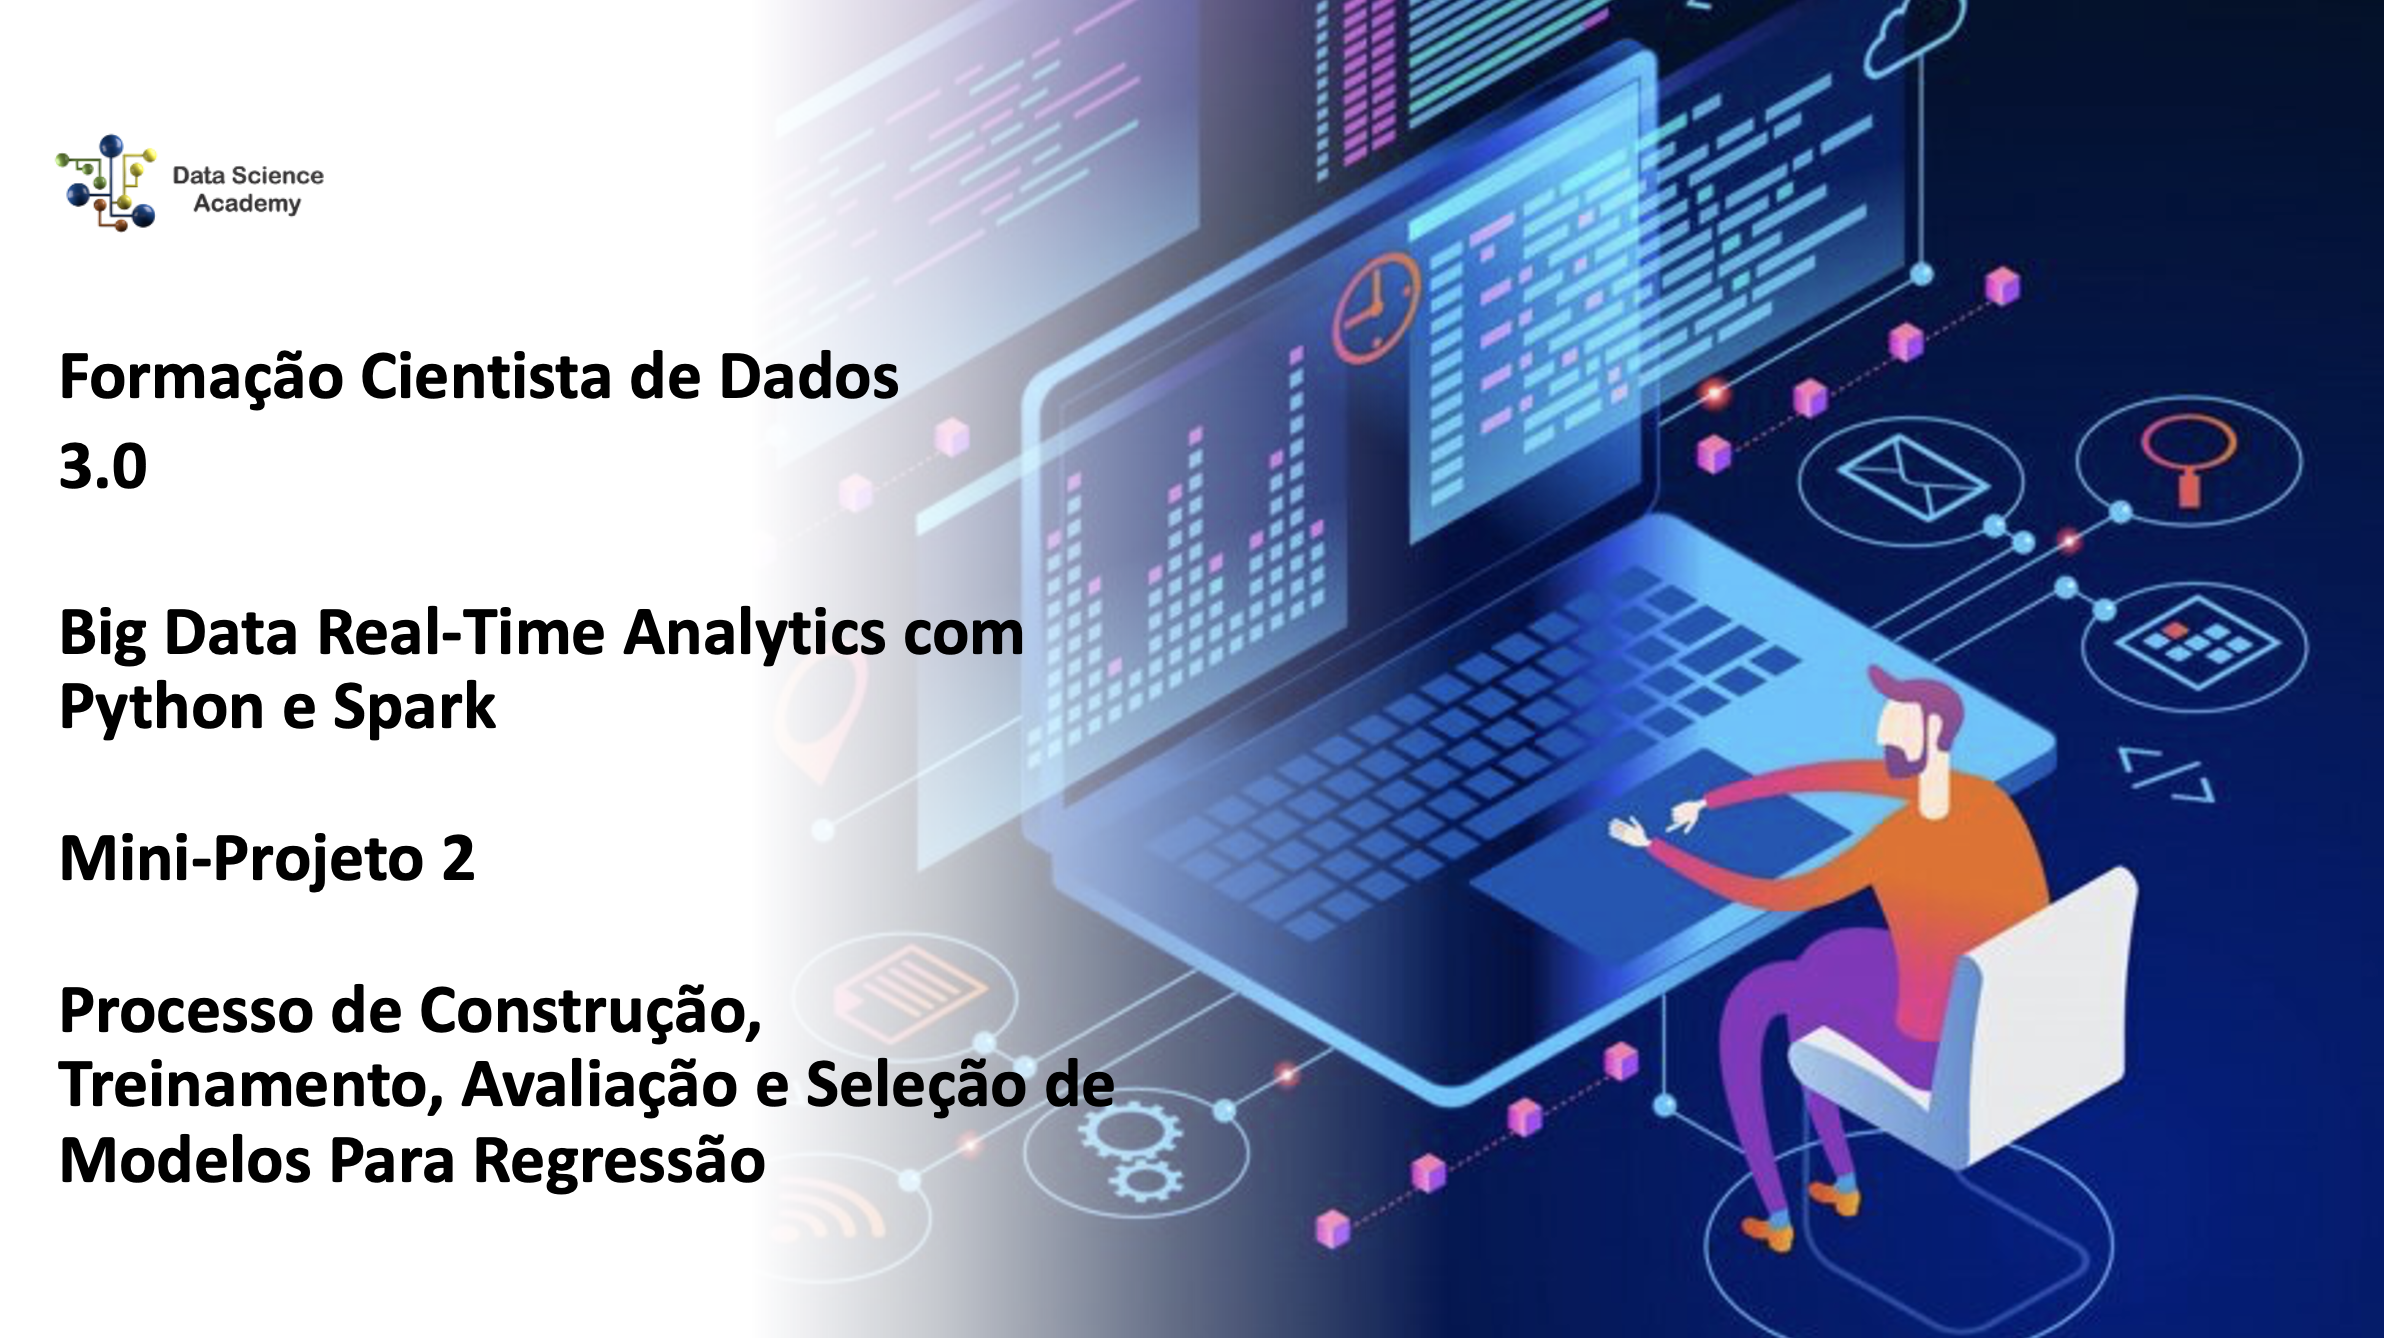

In [1]:
# Versão da Linguagem Python 
from platform import python_version
print("Versão da Linguagem Python usada neste Jupyter Notebook:", python_version())

Versão da Linguagem Python usada neste Jupyter Notebook: 3.7.13


In [2]:
# Instalando pacote watermark
!pip install -q -U watermark

     |████████████████████████████████| 1.6 MB 5.4 MB/s 


In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
# Versão dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a 'Analista - Alexsander Maia Simas' --iversion

Author: Analista - Alexsander Maia Simas

seaborn   : 0.11.2
sklearn   : 1.0.2
matplotlib: 3.2.2
pandas    : 1.3.5
numpy     : 1.21.6



##**Carregando os dados**

In [5]:
# Carregando o dataset
dados = pd.read_csv('dataset.csv')

In [7]:
dados.shape

(500, 5)

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [9]:
# Amostra
dados.sample(10)

tempo_cadastro_cliente  numero_medio_cliques_por_sessao  \
4                  4.034386                        32.770492   
102                3.827376                        33.304337   
172                3.905250                        33.700400   
359                2.870987                        32.848793   
117                3.120569                        32.049839   
244                3.811248                        31.525752   
268                4.403370                        32.299647   
384                4.794312                        33.672758   
54                 4.648199                        33.541231   
235                4.369367                        31.570201   

     tempo_total_logado_app  tempo_total_logado_website  valor_total_gasto  
4                 11.371767                   35.261498         502.771075  
102               12.692661                   37.333591         535.480775  
172               11.924395                   37.245032         552.940346  
359               10.973162                   36.609507         404.824529  
117               12.238057                   38.730862         478.719357  
244               11.340036                   37.039514         443.965627  
268               12.168596                   37.073616         547.110982  
384               13.420546                   37.763690         640.584062  
54                12.783892                   36.430650         619.895640  
235               13.378063                   36.337800         545.945492

##**Análise Exploratório de Dados**

In [10]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [11]:
# Verificando correlação (tabela)
dados.corr()

tempo_cadastro_cliente  \
tempo_cadastro_cliente                         1.000000   
numero_medio_cliques_por_sessao                0.060247   
tempo_total_logado_app                         0.029143   
tempo_total_logado_website                    -0.047582   
valor_total_gasto                              0.809084   

                                 numero_medio_cliques_por_sessao  \
tempo_cadastro_cliente                                  0.060247   
numero_medio_cliques_por_sessao                         1.000000   
tempo_total_logado_app                                 -0.027826   
tempo_total_logado_website                             -0.034987   
valor_total_gasto                                       0.355088   

                                 tempo_total_logado_app  \
tempo_cadastro_cliente                         0.029143   
numero_medio_cliques_por_sessao               -0.027826   
tempo_total_logado_app                         1.000000   
tempo_total_logado_website                     0.082388   
valor_total_gasto                              0.499328   

                                 tempo_total_logado_website  valor_total_gasto  
tempo_cadastro_cliente                            -0.047582           0.809084  
numero_medio_cliques_por_sessao                   -0.034987           0.355088  
tempo_total_logado_app                             0.082388           0.499328  
tempo_total_logado_website                         1.000000          -0.002641  
valor_total_gasto                                 -0.002641           1.000000

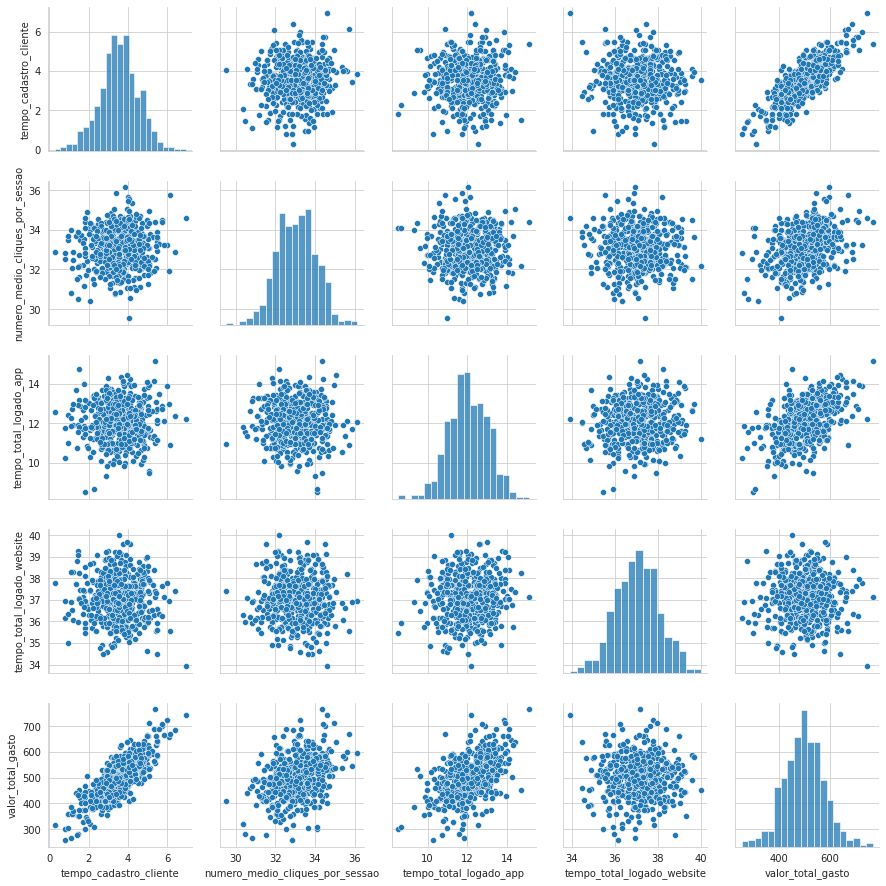

In [12]:
# Plot de correlação
sns.pairplot(dados)

##Análise 1 - Relação Entre tempo no web site e valor gasto

<Figure size 1296x864 with 0 Axes>

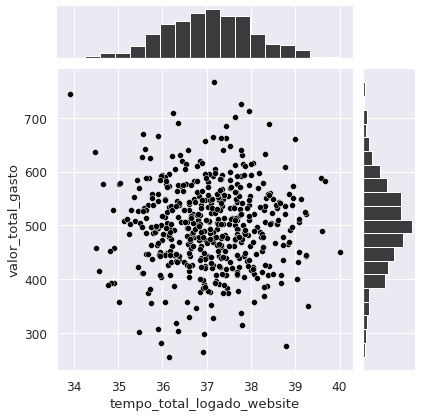

In [19]:
# Plotando
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,
              x = 'tempo_total_logado_website',
              y = 'valor_total_gasto',
              color = 'black')

Observando os histogramas, podemos ver que os dados estão normalmente distribuídos (seguem uma distribuição normal).

Observando o gráfico de dispersão, não parece haver correlação entre as duas variáveis. Vamos confirmar calculando o coeficiente de correlação entre elas.

In [14]:
# Correlação entre (tempo_total_logado_website x valor_total_gasto) 
dados[['tempo_total_logado_website', 'valor_total_gasto']].corr()

tempo_total_logado_website  valor_total_gasto
tempo_total_logado_website                    1.000000          -0.002641
valor_total_gasto                            -0.002641           1.000000

Não parece ter correlação.

##Análise 2 - Relação entre Tempo no app e Valor Gasto

In [15]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1296x864 with 0 Axes>

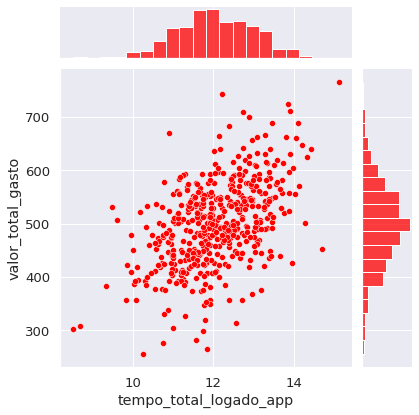

In [16]:
# Plotando 
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados,
              x = 'tempo_total_logado_app',
              y = 'valor_total_gasto',
              color = 'red')

Obsersando os histogramas, temos distribuição normal e uma correlação positiva entre as duas variáveis. 

Vamos calcular o coeficiente de correlação para deixar mais claro.

In [20]:
# Correlação
dados[['tempo_total_logado_app', 'valor_total_gasto']].corr()

tempo_total_logado_app  valor_total_gasto
tempo_total_logado_app                1.000000           0.499328
valor_total_gasto                     0.499328           1.000000

Realmente os dados tem correlação moderada positiva. Isso traduz que, tende aumentar o valor gasto mensalmente devido ao cliente passar mais tempo logado no app.

## Análise 3 - Relação entre Tempo na APP e Tempo de Cadastro

In [22]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1296x864 with 0 Axes>

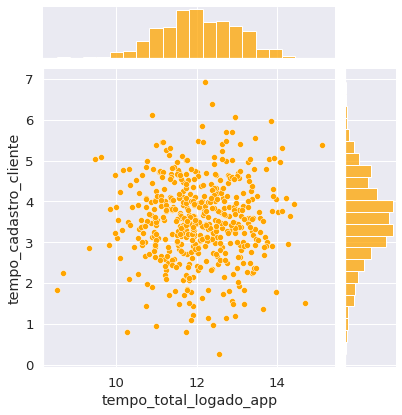

In [25]:
# Plotando 
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, 
              x = 'tempo_total_logado_app',
              y = 'tempo_cadastro_cliente',
              color = 'orange')

Nota-se que o gráfico de dispersão está bem concentrado no meio, inferindo assim, que não há correlação clara entre as duas variáveis. Destaca-se também que muitos clientes são membros a 2-5 e gastam 11,5 a 12,5 minutos no APP.

##Análise 4 - Relação entre tempo de Cadastro e valor gasto

In [26]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

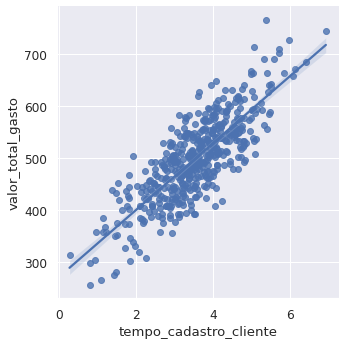

In [31]:
# Plot
sns.set(font_scale = 1.1)
sns.set_style('darkgrid')
sns.lmplot(y = 'valor_total_gasto', x = 'tempo_cadastro_cliente', data = dados)

In [32]:
dados[['tempo_cadastro_cliente', 'valor_total_gasto']].corr()

tempo_cadastro_cliente  valor_total_gasto
tempo_cadastro_cliente                1.000000           0.809084
valor_total_gasto                     0.809084           1.000000

Usando o plot(lmplot) e a tabela de correlação, infere-se que, existe uma correlação positiva forte. A medida que o cliente se torna mais antigo, o valor total gasto aumenta. 

Sobre a sombra ao redor da linha, é muita fina, indicando que os erros entre estimativa e os pontos de dados são relativamente pequenos.

##Análise 5 - Relação entre Tempo logado na APP e Tempo logado no Web Site

In [33]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1296x864 with 0 Axes>

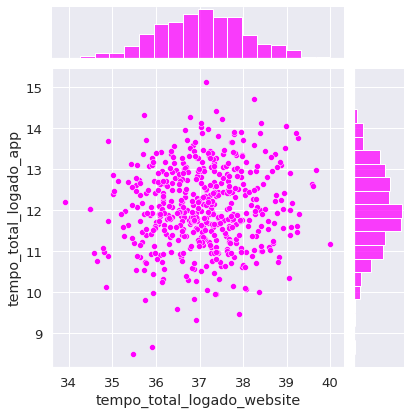

In [35]:
# Plot
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, y = 'tempo_total_logado_app', x = 'tempo_total_logado_website', color = 'magenta')

Não detectamos problemas críticos e vamos seguir para preparar o dataset.

##Pré-processamento de Dados para construção de Modelo de Machine Learning

In [36]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [37]:
# Variáveis de entrada(variáveis preditoras)
X = dados[['tempo_cadastro_cliente',
           'numero_medio_cliques_por_sessao',
           'tempo_total_logado_app',
           'tempo_total_logado_website']]

In [38]:
# Variável de saída (alvo ou target)
y = dados ['valor_total_gasto']

In [39]:
# Divisão dos dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size= 0.3, random_state = 101)

In [41]:
len(X_treino)

350

In [42]:
len(X_teste)

150

##Padronização

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(X_treino)

StandardScaler()

In [45]:
X_treino = scaler.transform(X_treino)

In [46]:
X_teste = scaler.transform(X_teste)

In [47]:
X_treino[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [48]:
X_teste[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

##Construção, Treinamento e Avaliação do Modelo 1 com Regressão Linear (Benchmark)

In [49]:
# Criando modelo
modelo_v1 = LinearRegression()

In [50]:
# Treinando o modelo
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [51]:
print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


In [52]:
# Coeficiente das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef

Coeficiente
tempo_cadastro_cliente             63.742207
numero_medio_cliques_por_sessao    26.239016
tempo_total_logado_app             38.571856
tempo_total_logado_website          0.684737

**Avaliação do modelo**

In [53]:
# Previsões com dados de teste
pred_v1 = modelo_v1.predict(X_teste)

In [54]:
# Imprimindo as 10 primeiras previsões
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

Text(0, 0.5, 'Valor Previsto de Y')

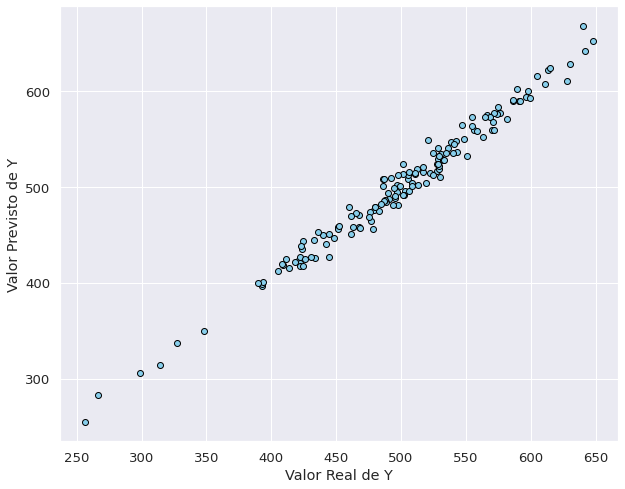

In [55]:
# Plotando 
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v1, color = 'skyblue', edgecolors= 'black')
plt.xlabel("Valor Real de Y")
plt.ylabel("Valor Previsto de Y")

O gráfico de dispersão mostra que tem uma correlação muito forte entre os Y´s previstos e reais, significa que temos um modelo muito bom.

**Métricas**

In [56]:
# Valor médio gasto pelos clientes
dados['valor_total_gasto'].mean()

499.31403826080003

In [57]:
# Valor mínimo
dados['valor_total_gasto'].min()

256.6705823

In [58]:
# Valor máximo
dados['valor_total_gasto'].max()

765.5184619

In [59]:
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred_v1)

7.762418645778977

O MAE prevê que, em média, as previsões do nosso modelo estão erradas em aproximadamente 7,76 reais, um valor pequeno comparado ao valor médio gasto por cliente.

In [60]:
# MSE - Erro quadrátco médio
mean_squared_error(y_teste, pred_v1)

94.95654308438658

In [61]:
# RMSE - Raiz quadrada do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, pred_v1))

9.744564797074654

O RMSE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 9.74, que é um valor pequeno comparado ao valor médio gasto por cliente.

In [62]:
# Coeficiente R2
r2_score(y_teste, pred_v1)

0.9813622791776302

In [63]:
# Variância Explicada
explained_variance_score(y_teste, pred_v1)

0.981744918342864

Nosso modelo é capaz de explicar 98% da variância dos dados, o que é maravilhoso.

O Coeficiente R2 de 98% e as outras métricas, demonstram que este é um modelo muito bom. Será que conseguimos melhorar essa performance?


**Resíduos**

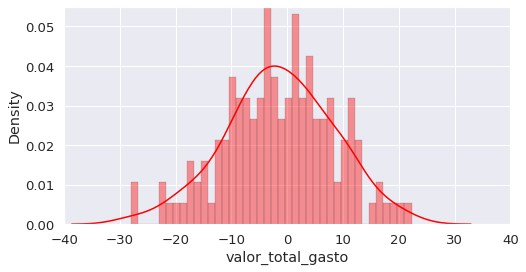

In [66]:
# Plot
plt.figure(figsize= (8,4))
ax = sns.distplot((y_teste - pred_v1),
                  bins = 40,
                  color = 'red',
                  hist_kws= dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40,40))
ax.set(ylim = (0,0.055));

Resíduos são aproximadamente normalmente distribuídos, o que indica um bom ajuste do modelo.

##**Construção, Treinamento e Avaliação do Modelo 2 com Regressão Ridge**

In [67]:
# Criando o modelo
modelo_v2 = Ridge(alpha = 1.0)

In [68]:
# Treinando o modelo
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [69]:
print('Coeficientes: \n', modelo_v2.coef_)

Coeficientes: 
 [63.57245999 26.17198131 38.46758178  0.68013543]


In [70]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2.coef_, X.columns, columns = ['Coeficiente'])
df_coef

Coeficiente
tempo_cadastro_cliente             63.572460
numero_medio_cliques_por_sessao    26.171981
tempo_total_logado_app             38.467582
tempo_total_logado_website          0.680135

In [71]:
# Previsões com dados de teste
pred_v2 = modelo_v2.predict(X_teste)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

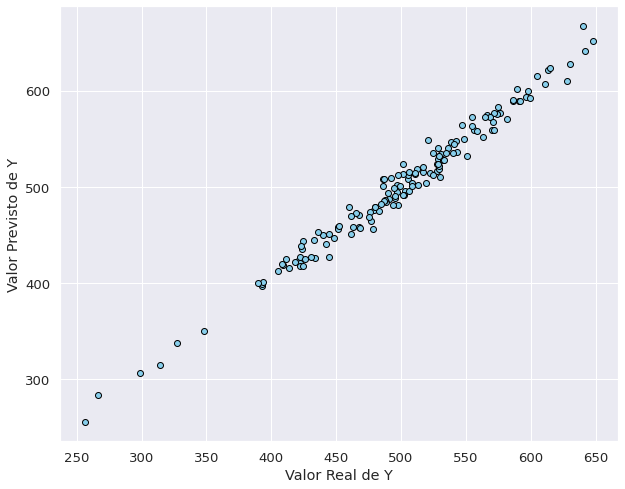

In [72]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [73]:
# MAE
mean_absolute_error(y_teste, pred_v2)

7.764151148981964

In [74]:
# MSE
mean_squared_error(y_teste, pred_v2)

94.93731602493466

In [76]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v2))

9.7435781941202

In [77]:
# Variância Explicada
explained_variance_score(y_teste, pred_v2)

0.9817472659016085

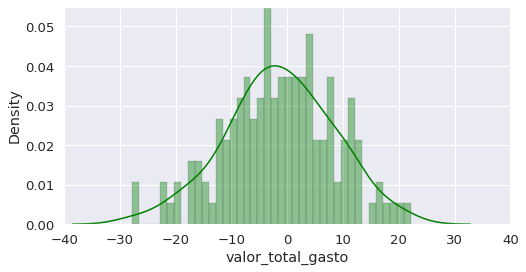

In [80]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v2),
                  bins = 40,
                  color = 'green',
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40,40))
ax.set(ylim = (0, 0.055));

##**Construção, Treinamento e Avaliação do Modelo 3 com Regressão LASSO**

In [81]:
# Criando o modelo 3
modelo_v3 = Lasso(alpha = 1.0)

In [82]:
# Treinando o modelo 3
modelo_v3.fit(X_treino, y_treino)

Lasso()

In [83]:
print('Coeficientes: \n', modelo_v3.coef_)

Coeficientes: 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [84]:
# Coeficientes
df_coef = pd.DataFrame(modelo_v3.coef_, X.columns, columns = ['Coeficiente'])
df_coef

Coeficiente
tempo_cadastro_cliente             62.863441
numero_medio_cliques_por_sessao    25.187472
tempo_total_logado_app             37.621492
tempo_total_logado_website          0.000000

In [86]:
# Previsões com dados de teste
pred_v3 = modelo_v3.predict(X_teste)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

Text(0, 0.5, 'Valor Previsto de Y')

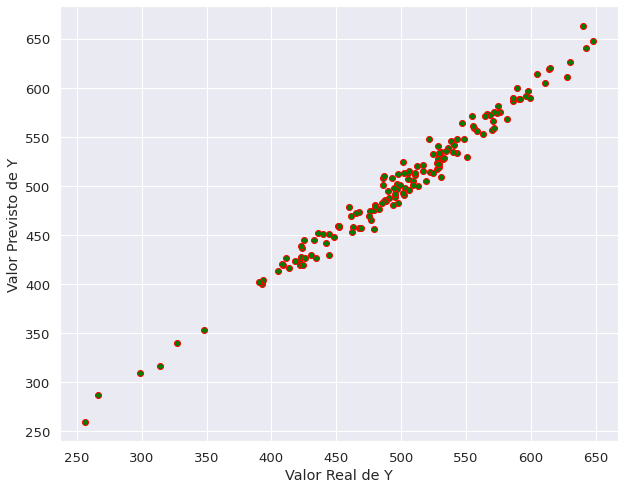

In [97]:
# Plotando
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v3, color = 'green', edgecolors= 'red')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')

In [98]:
# MAE
mean_absolute_error(y_teste, pred_v3)

7.7885046969510645

In [99]:
# MSE
mean_squared_error(y_teste, pred_v3)

96.05606348970672

In [100]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v3))

9.800819531534428

In [101]:
# Coeficiente R2
r2_score(y_teste, pred_v3)

0.981146469358873

In [103]:
# Variancia Explicaa
explained_variance_score(y_teste, pred_v3)

0.9815600649101045

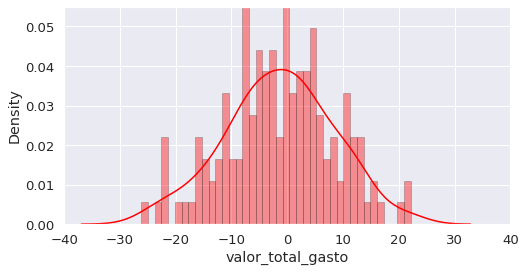

In [107]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v3),
                  bins = 40,
                  color = 'red',
                  hist_kws= dict(edgecolor = 'black', linewidth = 0.5))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

**SELEÇÃO DO MODELO**

O modelo 3 apresentou uma taxa de erro (RMSE) levemente maior e pode ser descartado. Os modelo 1 e 2 ficaram mais próximos e neste caso devemos escolher o modelo mais simples, que em nosso exemplo é o modelo 1.

##**Conclusão**

In [108]:
dados.head()

tempo_cadastro_cliente  numero_medio_cliques_por_sessao  \
0                3.472021                        33.119954   
1                4.198349                        35.371876   
2                2.086348                        33.976083   
3                3.605934                        34.034164   
4                4.034386                        32.770492   

   tempo_total_logado_app  tempo_total_logado_website  valor_total_gasto  
0               12.953263                   37.034280         534.771485  
1               10.572467                   36.862183         537.915753  
2               11.658037                   37.425279         407.876378  
3               13.592513                   36.838657         618.845970  
4               11.371767                   35.261498         502.771075

In [109]:
# Coeficientes
df_coef_final = pd.DataFrame(modelo_v1.coef_, X.columns, columns=['Coeficiente'])
df_coef_final

Coeficiente
tempo_cadastro_cliente             63.742207
numero_medio_cliques_por_sessao    26.239016
tempo_total_logado_app             38.571856
tempo_total_logado_website          0.684737

#### Interpretações dos Coeficientes:

* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo de cadastro do cliente está associado a um aumento de R$ 63.74 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no número médio de cliques por sessão está associado a um aumento de R$ 26.24 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado na app está associado a um aumento de R$ 38.57 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado no web site está associado a um aumento de R$ 0.68 no valor total gasto por cliente por mês.


Podemos ver que será mais lucrativo para a empresa investir na atualização da sua app uma vez que o retorno será maior. Além disso, é importante criar políticas para reter o cliente por mais tempo, já que isso também leva ao aumento das vendas. A própria atualização da app será uma forma de reter o cliente por mais tempo.

Não compensa, neste momento, investir na atualização do web site pois o retorno será mínimo.

# Fim